In [160]:
import pandas as pd
import numpy as np
import random
from typing import List, Callable
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, minmax_scale, scale
from sklearn.metrics import confusion_matrix, log_loss, mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from sklearn.utils import shuffle

In [161]:
df = pd.read_csv("D:\\perturbation_on_chip_learning\\Perturbation-techniques-in-CNNs\\data\\Iris.csv")

In [162]:
y = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [163]:
Xn = df.iloc[:, 1:5]
Xn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [164]:
yn = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
yn = yn.to_numpy()
yn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [165]:
Xn = df.iloc[:, 1:5]
Xn = Xn.to_numpy()
Xn.shape

(150, 4)

In [166]:
Xn = minmax_scale(Xn, feature_range=(0, 1), copy=False)
Xn

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [167]:
x_train, x_val, y_train, y_val = train_test_split(Xn, yn, test_size=0.1, random_state=42) #split the data into train and validation

In [168]:
x_train = x_train.T #take the transpose of the training data m*784 -> 784*m
x_val = x_val.T #take the transpose of the test data m*784 -> 784*m
print(x_train.shape, x_val.shape)

(4, 135) (4, 15)


In [169]:
def params_init(seed=2):

  np.random.seed(seed)
  W1 = np.random.rand(50,4) - 0.5
  b1 = np.random.rand(50,1) - 0.5
  W2 = np.random.rand(3,50) - 0.5 
  b2 = np.random.rand(3,1) - 0.5 
  print("Params Initialised")

  return (W1, b1, W2, b2)

In [170]:

def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/(Y.shape[0])*100

In [171]:
def relu(x):
   return np.maximum(x,0)


def softmax(Z):
  #return np.exp(Z) / np.sum(np.exp(Z),0)
  Z = Z-np.max(Z, axis=0)
  return np.exp(Z) / np.sum(np.exp(Z),0)


def relu_d(x):
  return x>0

def one_hot_encoding(y):
  shape = (y.shape[0], 3)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T

def crossEntropy(y,y_pre):
  loss=-np.sum(np.multiply(y, np.log(y_pre)), axis = 0)
  return loss

In [172]:
def forward(x_train, W1, b1, W2, b2):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2
  A2 = softmax(Z2)
  

  return Z1, A1, Z2, A2

In [173]:
def param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):

  #updates the parameters based on backpropogation

  W1 = W1 - lr*dW1
  b1 = b1 - lr*(db1.reshape(b1.shape))
  W2 = W2 - lr*dW2
  b2 = b2 - lr*(db2.reshape(b2.shape))


  return W1, b1, W2, b2

In [174]:
def backprop(Z1, A1, Z2, A2, W1, W2, X, y):
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)

  dZ2 = (A2 - Y)
  
  dW2 = 1/m*np.matmul(dZ2,A1.T)

  db2 = 1/m*np.sum(dZ2, axis=1)

  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1, axis=1) #db1 is 50*1


  return dW1, db1, dW2, db2

In [175]:
def batch_grad_descent(X,Y,iter, lr, print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      #X1 = X1.T #take transpose to match the sizes
      X1, Y1 = X, Y

      Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 

      dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _,  A2_train = forward(X, W1, b1, W2, b2)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1, b1, W2, b2)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [176]:
_, _, _, _, train_accBP, val_accBP, train_loss, val_loss, sum_weights = batch_grad_descent(x_train,y_train,iter=100, lr=0.01, print_op=1);

Params Initialised
Iteration: 1
Train accuracy: 37.77777777777778
Val accuracy: 40.0
Iteration: 2
Train accuracy: 41.48148148148148
Val accuracy: 46.666666666666664
Iteration: 3
Train accuracy: 42.96296296296296
Val accuracy: 46.666666666666664
Iteration: 4
Train accuracy: 45.925925925925924
Val accuracy: 46.666666666666664
Iteration: 5
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 6
Train accuracy: 48.888888888888886
Val accuracy: 46.666666666666664
Iteration: 7
Train accuracy: 49.629629629629626
Val accuracy: 53.333333333333336
Iteration: 8
Train accuracy: 52.59259259259259
Val accuracy: 53.333333333333336
Iteration: 9
Train accuracy: 56.2962962962963
Val accuracy: 53.333333333333336
Iteration: 10
Train accuracy: 56.2962962962963
Val accuracy: 53.333333333333336
Iteration: 11
Train accuracy: 56.2962962962963
Val accuracy: 73.33333333333333
Iteration: 12
Train accuracy: 57.77777777777777
Val accuracy: 73.33333333333333
Iteration: 13
Train accuracy: 59.

In [177]:
def WP(W1, b1, W2, b2, pert, lossBeforePert, X, y):
    m = y.shape[0] #m is the number of training examples
    Y = one_hot_encoding(y)
    dW1 = np.zeros_like(W1)
    lossAfterPertW1 = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1pert = W1.copy()
            W1pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1pert, b1, W2, b2)
            lossAfterPertW1[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW1 = 1/m * (lossAfterPertW1-lossBeforePert)/pert


    db1 = np.zeros_like(b1)
    lossAfterPertb1 = np.zeros_like(b1)
    for i in range(b1.shape[0]):
        b1pert = b1.copy()
        b1pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1pert, W2, b2)
        lossAfterPertb1[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db1 = 1/m * (lossAfterPertb1-lossBeforePert)/pert

    
    dW2 = np.zeros_like(W2)
    lossAfterPertW2 = np.zeros_like(W2)
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2pert = W2.copy()
            W2pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1, b1, W2pert, b2)
            lossAfterPertW2[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW2 = 1/m * (lossAfterPertW2-lossBeforePert)/pert


    db2 = np.zeros_like(b2)
    lossAfterPertb2 = np.zeros_like(b2)
    for i in range(b2.shape[0]):
        b2pert = b2.copy()
        b2pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1, W2, b2pert)
        lossAfterPertb2[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db2 = 1/m * (lossAfterPertb2-lossBeforePert)/pert

    return dW1, db1, dW2, db2
            

In [178]:
def batch_grad_descentWP(X,Y,iter, lr, pert, print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      X1, Y1 = X, Y
      #X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 
      print(f"BP Iter {i+1} -> sub iter {j} : {accuracy(predictions(A2), Y1)}", end = "\r", flush = True)

      #dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)
      loss = np.sum(crossEntropy(one_hot_encoding(Y1), A2))
      dW1, db1, dW2, db2 = WP(W1, b1, W2, b2, pert=pert, lossBeforePert=loss, X=X1, y=Y1)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)


    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _,  A2_train = forward(X, W1, b1, W2, b2)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1, b1, W2, b2)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [179]:
batch_grad_descentWP(x_train,y_train,iter=100, lr=0.01, pert=1, print_op=1);

Params Initialised
Iteration: 1 sub iter 0 : 35.55555555555556
Train accuracy: 38.51851851851852
Val accuracy: 40.0
Iteration: 2 sub iter 0 : 38.51851851851852
Train accuracy: 41.48148148148148
Val accuracy: 46.666666666666664
Iteration: 3 sub iter 0 : 41.48148148148148
Train accuracy: 42.96296296296296
Val accuracy: 46.666666666666664
Iteration: 4 sub iter 0 : 42.96296296296296
Train accuracy: 46.666666666666664
Val accuracy: 46.666666666666664
Iteration: 5 sub iter 0 : 46.666666666666664
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 6 sub iter 0 : 48.148148148148145
Train accuracy: 48.888888888888886
Val accuracy: 53.333333333333336
Iteration: 7 sub iter 0 : 48.888888888888886
Train accuracy: 52.59259259259259
Val accuracy: 53.333333333333336
Iteration: 8 sub iter 0 : 52.59259259259259
Train accuracy: 54.81481481481482
Val accuracy: 53.333333333333336
Iteration: 9 sub iter 0 : 54.81481481481482
Train accuracy: 55.55555555555556
Val accuracy: 53.333333

In [180]:
pertList = [0.1, 0.01, 0.001, 0.0001]
trainAccWP = []
valAccWP = []
for pert in pertList:
    _, _, _, _, train_acc, val_acc, train_loss, val_loss, sum_weights = batch_grad_descentWP(x_train,y_train,100, 0.01, pert = pert, print_op=1);
    trainAccWP.append(train_acc)
    valAccWP.append(val_acc)

Params Initialised
Iteration: 1 sub iter 0 : 35.55555555555556
Train accuracy: 37.77777777777778
Val accuracy: 40.0
Iteration: 2 sub iter 0 : 37.77777777777778
Train accuracy: 41.48148148148148
Val accuracy: 46.666666666666664
Iteration: 3 sub iter 0 : 41.48148148148148
Train accuracy: 42.96296296296296
Val accuracy: 46.666666666666664
Iteration: 4 sub iter 0 : 42.96296296296296
Train accuracy: 45.925925925925924
Val accuracy: 46.666666666666664
Iteration: 5 sub iter 0 : 45.925925925925924
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 6 sub iter 0 : 48.148148148148145
Train accuracy: 48.888888888888886
Val accuracy: 46.666666666666664
Iteration: 7 sub iter 0 : 48.888888888888886
Train accuracy: 51.11111111111111
Val accuracy: 53.333333333333336
Iteration: 8 sub iter 0 : 51.11111111111111
Train accuracy: 53.333333333333336
Val accuracy: 53.333333333333336
Iteration: 9 sub iter 0 : 53.333333333333336
Train accuracy: 56.2962962962963
Val accuracy: 53.33333

Text(0.5, 1.0, 'Accuracy vs epochs for different techiques')

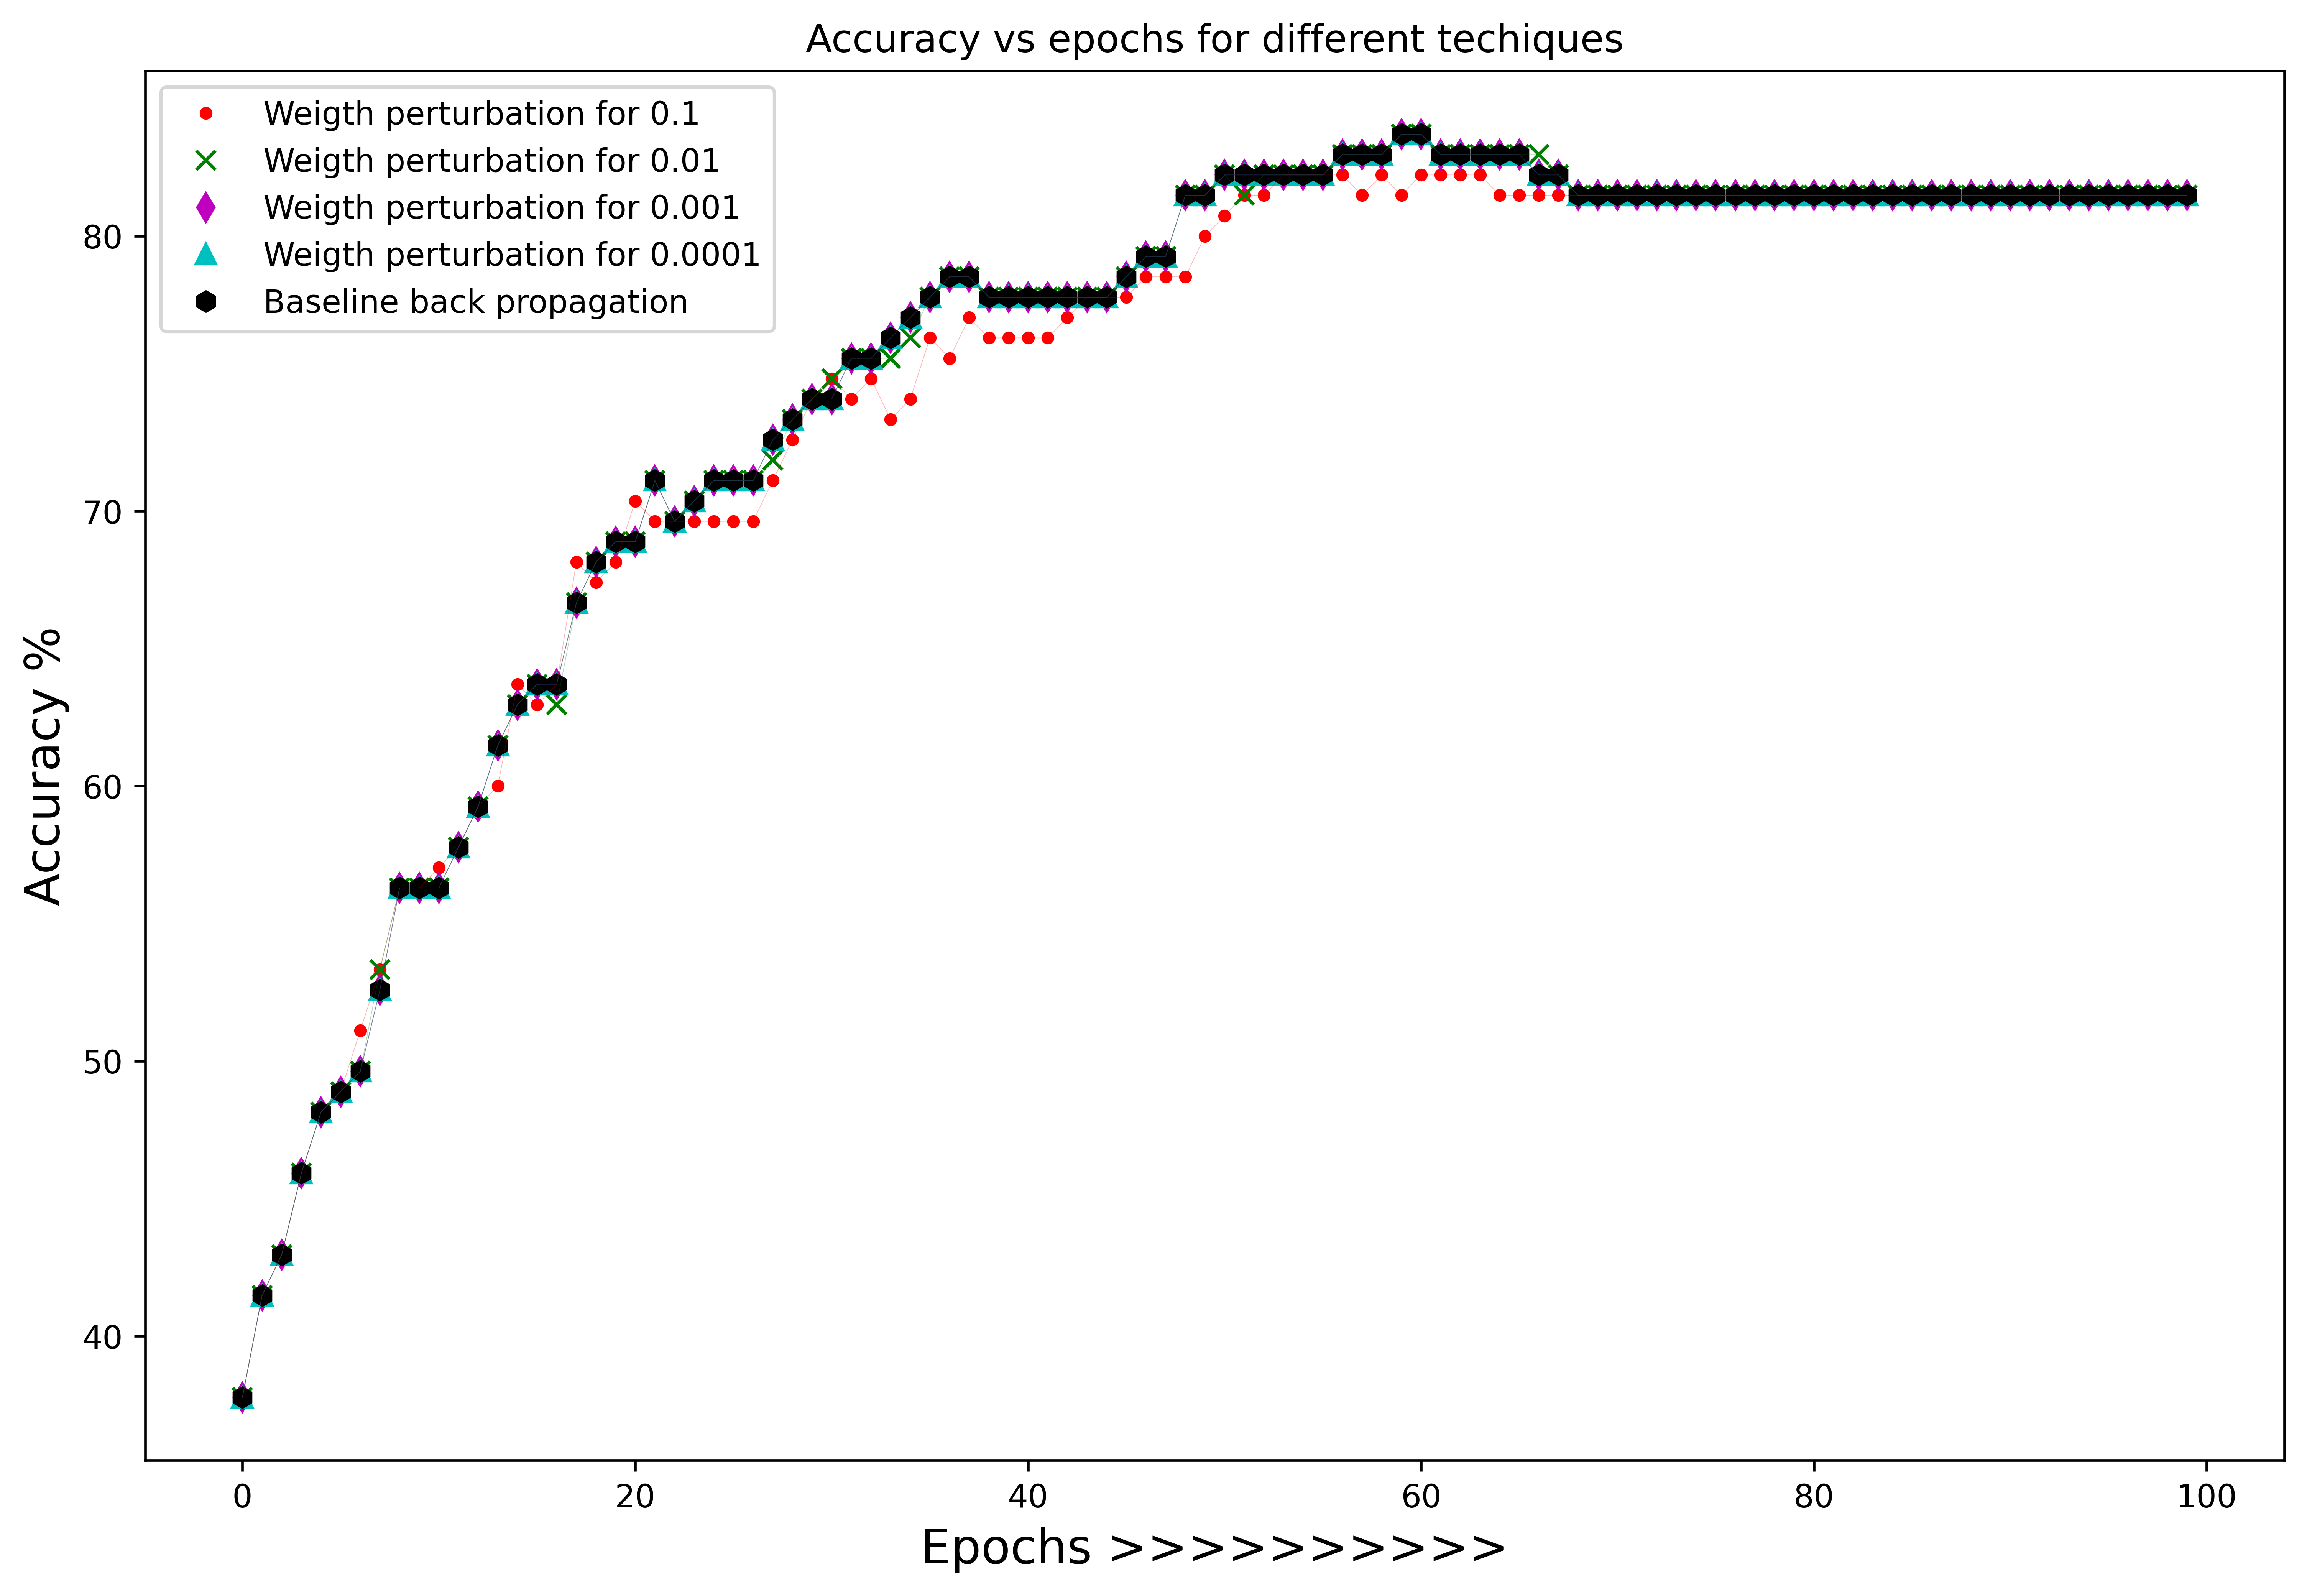

In [181]:
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(12, 8))
format = ['r.', 'gx', 'md', 'c^']
col = ['r', 'g', 'm', 'c']
leg = []
for _ in range(len(pertList)):
    plt.plot(trainAccWP[_], format[_])
    leg.append(f"Weigth perturbation for {pertList[_]}")
plt.plot(train_accBP, 'kh')
leg.append("Baseline back propagation")
for _ in range(len(pertList)):
    plt.plot(trainAccWP[_], col[_], linewidth=0.2, alpha = 0.3)
plt.plot(train_accBP, 'k', linewidth=0.2, alpha = 0.3)
plt.legend(leg)
plt.xlabel("Epochs >>>>>>>>>>", size = 15)
plt.ylabel("Accuracy %", size = 15)
plt.title("Accuracy vs epochs for different techiques")